In [41]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'concrete.csv'  # Update path if needed
concrete_data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = concrete_data.drop(columns=['strength'])
y = concrete_data['strength']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Square Error (RMSE): 5.186700657233386
R² Score: 0.9075662985482985


<ipython-input-42-68d69e23e3bc>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Perfect line


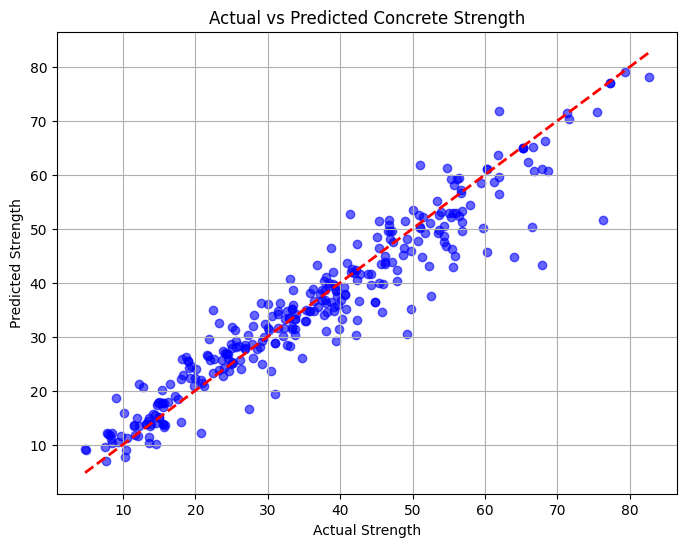

In [42]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)  # Predicted vs Actual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Perfect line
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted Concrete Strength")
plt.grid()
plt.show()


In [43]:
# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({
    'Actual Strength': y_test,
    'Predicted Strength': y_pred
})

# Display the first few rows
print(results_df.head())


     Actual Strength  Predicted Strength
339            47.78            42.33610
244            48.79            46.38760
882            33.70            31.41334
567            18.28            22.81250
923            14.99            17.84430


In [45]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [47]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, "concrete_strength_model.pkl")


Model saved successfully as concrete_strength_model.pkl!


In [48]:
import gradio as gr
import joblib
import pandas as pd

# Load the trained model (ensure the model file is in the same directory)
model = joblib.load("concrete_strength_model.pkl")

# Define a prediction function
def predict_strength(cement, slag, ash, water, superplastic, coarseagg, fineagg, age):
    # Create a DataFrame with input features
    input_data = pd.DataFrame([{
        "cement": cement,
        "slag": slag,
        "ash": ash,
        "water": water,
        "superplastic": superplastic,
        "coarseagg": coarseagg,
        "fineagg": fineagg,
        "age": age
    }])

    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# Create Gradio interface
inputs = [
    gr.Number(label="Cement"),
    gr.Number(label="Slag"),
    gr.Number(label="Ash"),
    gr.Number(label="Water"),
    gr.Number(label="Superplastic"),
    gr.Number(label="Coarse Aggregate"),
    gr.Number(label="Fine Aggregate"),
    gr.Number(label="Age (days)")
]

output = gr.Number(label="Predicted Strength")

app = gr.Interface(fn=predict_strength, inputs=inputs, outputs=output, title="Concrete Strength Predictor")

# Launch the app
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://28e919a4ce8a47f34e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
